# Ejemplo

Analizamos las frecuencias de una función trigonométrica que representa una base de datos con temperatura horaria.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
from scipy.signal import find_peaks

Asumimos que la base de datos viene con una temperatura cada hora. Por tanto, la medida de unidad del tiempo es horas. Para testear el análisis de Fourier, generamos una serie de tiempo con un punto de muestra cada hora (sampling rate = 1) y una duración de diez días (240 horas).

In [30]:
sampling_rate = 1 # número de mediciones por hora
time_length = 24 * 10 # número de horas para generar datos

In [31]:
n_samples = sampling_rate * time_length

La frecuencia de la temperatura esperada es un día. Es decir, hay oscilaciones diarias en la temperatura. Dado que la base de datos es en horas, tenemos que definir la frecuencia como el inverso de 24 horas.

In [32]:
frequency = 1 / 24 # la frecuencia es un día: 24 horas

Generamos la temperatura horaria, donde elegimos una temperatura promedio de 20 grados con cambios de 10 grados y un error de medición Gausiano.

In [33]:
time_samples = np.linspace(0, time_length, n_samples, endpoint=False)
temperature = 20 + 10 * np.cos(2*np.pi * frequency * time_samples) + np.random.normal(0, 1, n_samples)

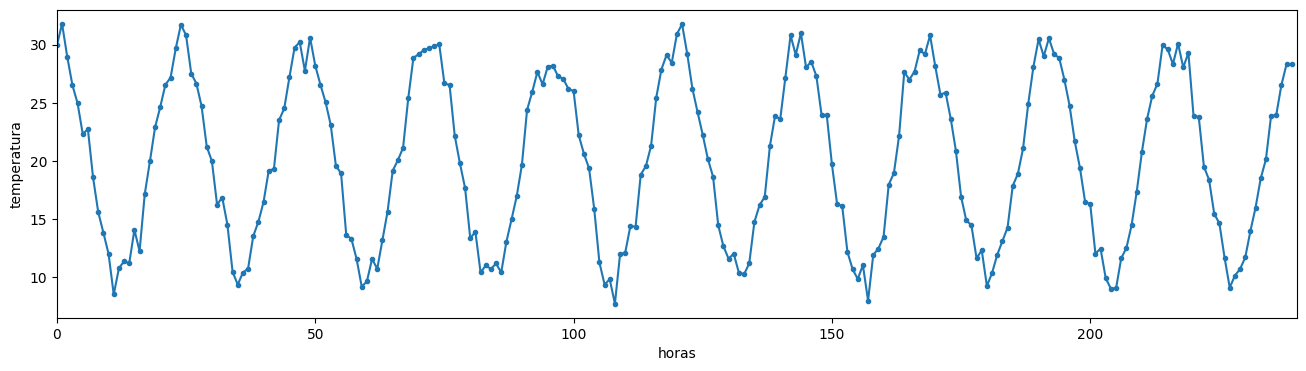

In [34]:
fig = plt.figure(figsize=(16,4))

plt.plot(time_samples, temperature, marker='.')

plt.xlim([0, time_length])

plt.xlabel('horas')
plt.ylabel('temperatura')

plt.show()

Calculamos la transformada de Fourier de la temperatura con el algoritmo Real Fast Fourier Transform (RFFT). Además, calculamos las frecuencias que corresponden a la salida de la función de SciPy.

In [35]:
temperature_fft = rfft(temperature)
freqs_fft = rfftfreq(n_samples, 1 / sampling_rate)

In [36]:
temperature_fft_scaled = np.abs(temperature_fft) / (n_samples/2) # escalar la amplitud de cada frecuencia
freqs_fft_day = freqs_fft * 24 # escalar frecuencias de horas a días

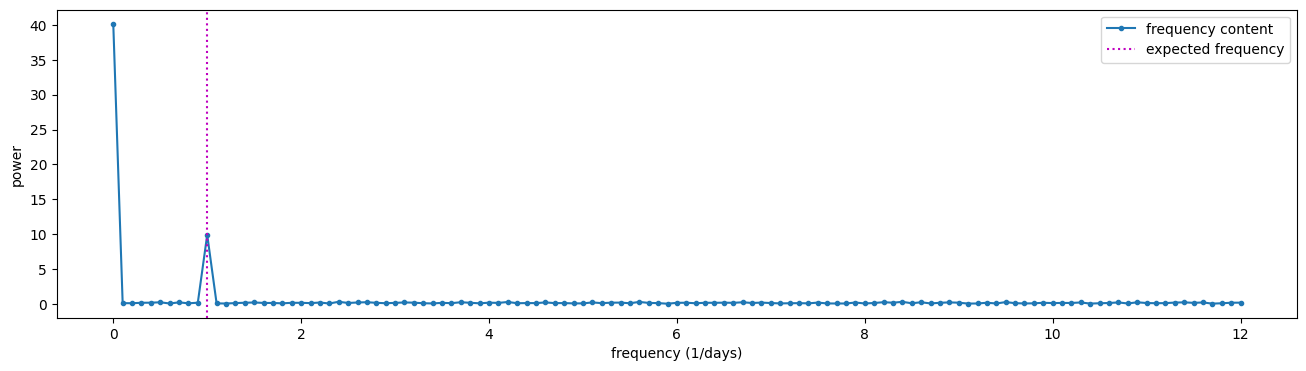

In [37]:
fig = plt.figure(figsize=(16,4))

plt.plot(freqs_fft_day, temperature_fft_scaled, marker='.', label='frequency content')
plt.axvline(frequency*24, color='m', linestyle=':', label='expected frequency')

plt.xlabel('frequency (1/days)')
plt.ylabel('power')
plt.legend()

plt.show()

Buscamos los peaks con una altura de al menos un grado Celsius.

In [38]:
peaks, _ = find_peaks(temperature_fft_scaled, height=1)

for p in [0] + list(peaks):
    print("Amplitude at frequency of " + str(freqs_fft_day[p]) + " per day is " + str(temperature_fft_scaled[p]) + " degrees Celsius.")

Amplitude at frequency of 0.0 per day is 40.18564691671427 degrees Celsius.
Amplitude at frequency of 1.0 per day is 9.893692918036681 degrees Celsius.


Efectivamente se puede ver un valor de diez en la frecuencia de un día, como se espera para una oscilación con amplitud 10 y periodo de 1 día. El peak para la frecuencia cero corresponde a la temperatura promedio en estos días. Su amplitud es dos veces la temperatura promedio porque es en el borde del dominio de las frecuencias.

# TAREA 

In [49]:
# Importar datos de data.csv
import pandas as pd

data = pd.read_csv('data.csv')

In [53]:
#Pregunta 2
df['Temperatura (C)'] = df['Temperatura (C)'].interpolate()

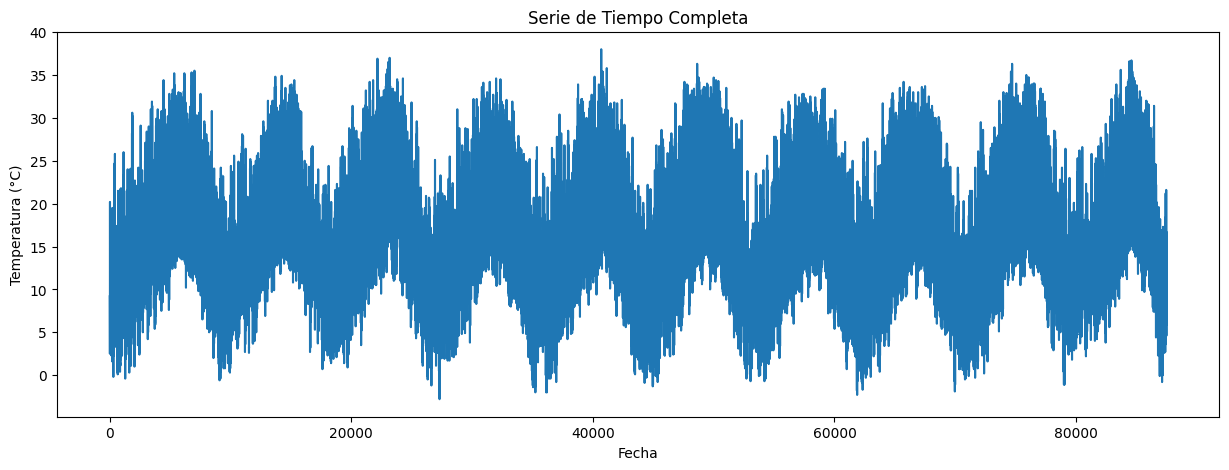

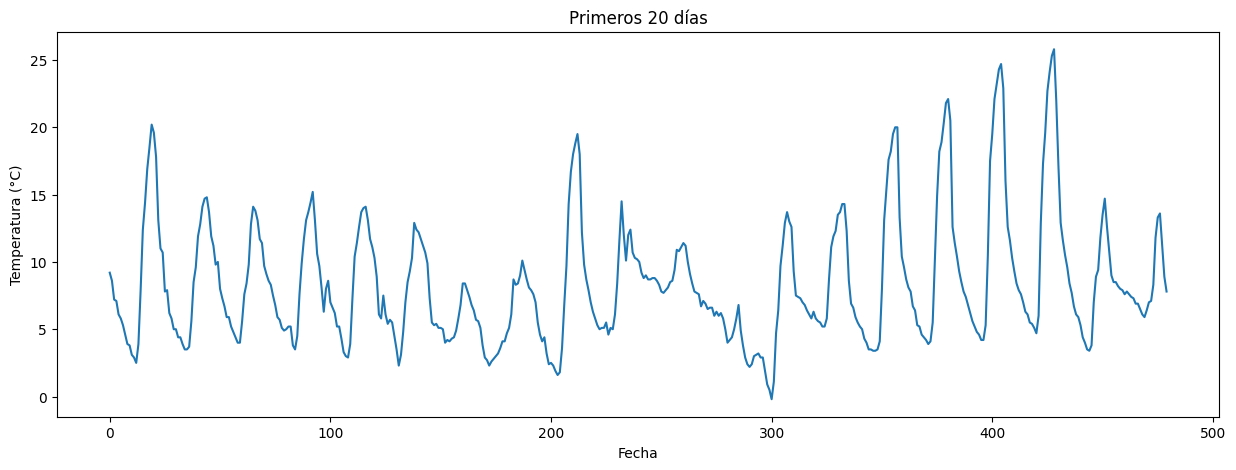

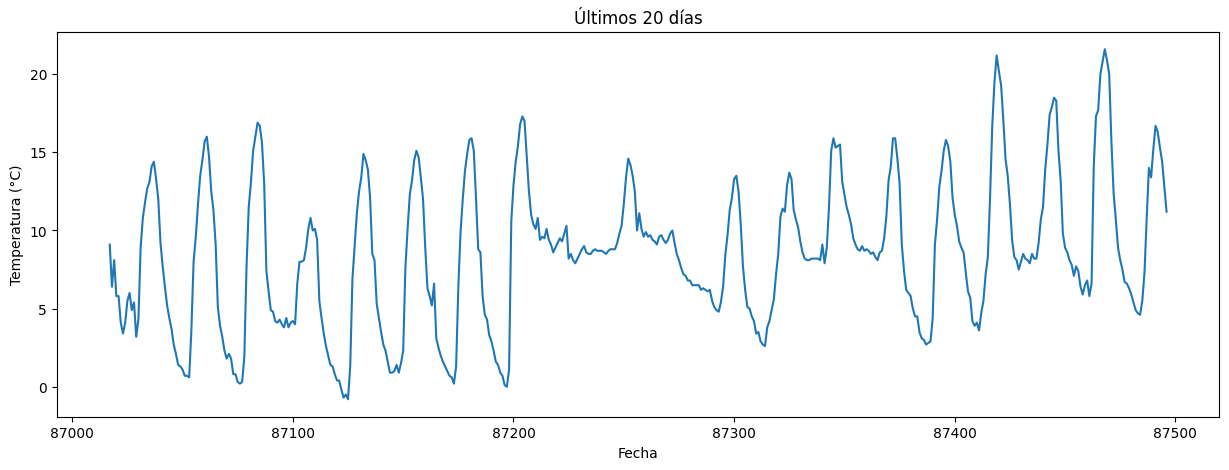

In [54]:
#Pregunta 3
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Temperatura (C)'])
plt.title('Serie de Tiempo Completa')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.show()

#primeros 20 dias
plt.figure(figsize=(15, 5))
plt.plot(df.index[:20*24], df['Temperatura (C)'][:20*24])
plt.title('Primeros 20 días')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.show()

#últimos 20 días
plt.figure(figsize=(15, 5))
plt.plot(df.index[-20*24:], df['Temperatura (C)'][-20*24:])
plt.title('Últimos 20 días')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.show()

In [82]:
#Pregunta 4
temperature_data = df['Temperatura (C)'].values
temperature = 20 + 10 * np.cos(2*np.pi * frequency * np.arange(len(temperature_data))) + np.random.normal(0, 1, len(temperature_data))
temperature_fft = rfft(temperature)
freqs_fft = rfftfreq(len(temperature), 1 / 24)

In [83]:
temperature_fft_scaled = np.abs(temperature_fft) / (len(temperature)/2) # escalar la amplitud de cada frecuencia
freqs_fft_day = freqs_fft * 24 # escalar frecuencias de horas a días

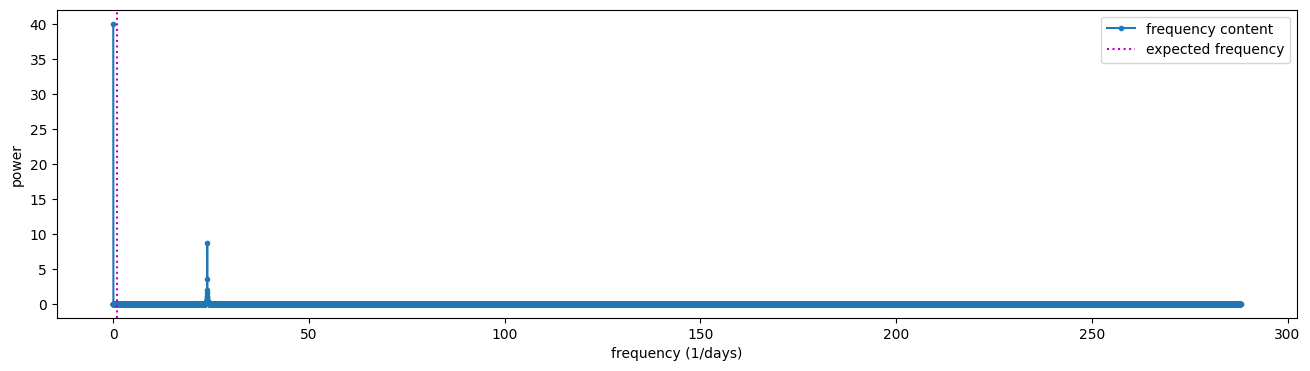

In [85]:
#pregunta 5
fig = plt.figure(figsize=(16,4))

plt.plot(freqs_fft_day, temperature_fft_scaled, marker='.', label='frequency content')
plt.axvline(frequency*24, color='m', linestyle=':', label='expected frequency')

plt.xlabel('frequency (1/days)')
plt.ylabel('power')
plt.legend()

plt.show()


C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_7376\2164999933.py:2: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / freqs_fft_day


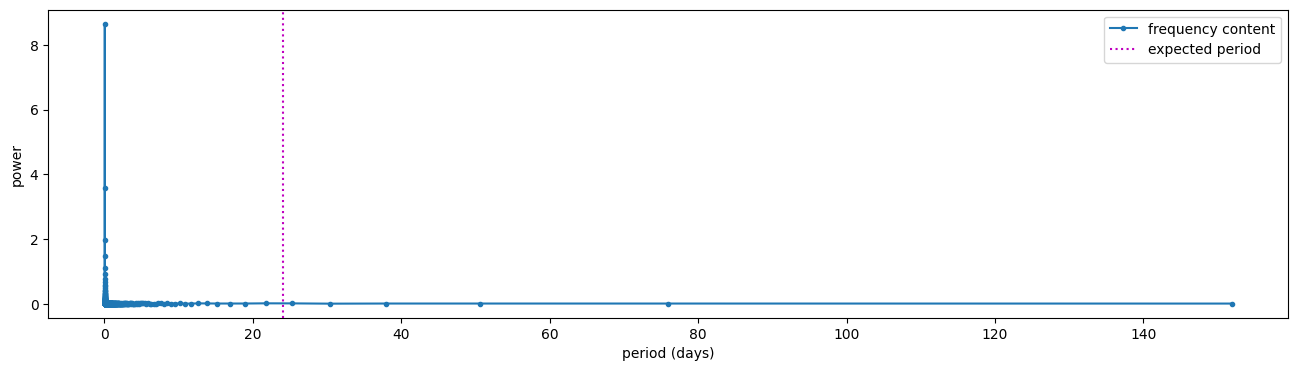

In [86]:
#pregunta 6 : Calcular el Periodo en Días para Cada Frecuencia y Dibujar Amplitud para Cada Periodo
periods = 1 / freqs_fft_day

fig = plt.figure(figsize=(16,4))

plt.plot(periods, temperature_fft_scaled, marker='.', label='frequency content')
plt.axvline(1/frequency, color='m', linestyle=':', label='expected period')

plt.xlabel('period (days)')
plt.ylabel('power')
plt.legend()



In [81]:
#7
peaks, _ = find_peaks(temperature_fft_scaled, height=1)

for p in [0] + list(peaks):
    print("Amplitude at frequency of " + str(freqs_fft_day[p]) + " per day is " + str(temperature_fft_scaled[p]) + " degrees Celsius.")


Amplitude at frequency of 0.0 per day is 31.009795764426215 degrees Celsius.
Amplitude at frequency of 0.06583082848554808 per day is 6.6638770010320245 degrees Celsius.
Amplitude at frequency of 23.975587734436612 per day is 1.519707421732447 degrees Celsius.
Amplitude at frequency of 24.00192006583083 per day is 2.3283954955839317 degrees Celsius.
Amplitude at frequency of 24.028252397225046 per day is 2.668836629811897 degrees Celsius.
Amplitude at frequency of 24.054584728619268 per day is 1.263388681374878 degrees Celsius.
